# Temperature anomalies - A prelimnary analysis

## Introduction

In this section we explore a real world data set. We consider land-surface temperature anomalies provided by [__Berkeley Earth__](http://berkeleyearth.org/), an independent non-profit entity, which established an [open database](http://berkeleyearth.org/data/) with air temperature data of different spatial and temporal scales. 

### Objectives

#### 1. We explore the global temperature anomaly from 1750 to present.
#### 2. We construct an informative time series plot for the global temperature anomaly.   
#### 3. We write a function to plot temperature anomalies for any given country/region of the database.
#### 4. Save a nice locking time series plot to disk.


***
## Getting started

We start by importing the packages/libraries that we will need for these tasks.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# this call causes the figures to be plotted below the code cells
%matplotlib inline   

***
## Objective 1 - Explore the global temperature anomaly from 1750 to present
    

The land-surface average temperature data set produced by the Berkeley Averaging method is found online:

http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_complete.txt

We already downloaded the data set for you. It is stored in the `../data` folder under the filename `Complete_TAVG_complete.txt`.



#### **Challenge 1: Inspect the first 50 lines of the raw text file and read the metadata to get familiar with the nature of the data set and its generation. (Time: 3 Minutes)**   

>Hint: To run a shell command from within the `Jupyter Notebook` use the `!` magic.    
### macOS/Linux: 
- In order to look at the first 50 lines of the text file you may use the `bash` command 

```bash
!head -50 PATH_TO_FILE/FILENAME
```

### Windows: 
- In order to use the `!` magic with powershell please run 
```python
import os
os.environ['comspec']='powershell.exe'
```

- In order to look at the first 50 lines of the text file you may use the `powershell` command 

```powershell
!gc PATH_TO_FILE/FILENAME -head 50
```


In [2]:
## your code here ...

#### macOS/Linux Solution

In [3]:
# %load ../src/_solutions/time_series_analysis_macos_linux
## Solution Challenge 1
!head -50 ../data/Complete_TAVG_complete.txt


% This file contains a detailed summary of the land-surface average 
% results produced by the Berkeley Averaging method.  Temperatures are 
% in Celsius and reported as anomalies relative to the Jan 1951-Dec 1980 
% average.  Uncertainties represent the 95% confidence interval for 
% statistical and spatial undersampling effects.
% 
% The current dataset presented here is described as: 
% 
%   Estimated Global Land-Surface TAVG based on the Complete Berkeley Dataset
% 
% 
% This analysis was run on 05-May-2021 08:21:24
% 
% Results are based on 50575 time series 
%   with 20771655 data points
% 
% Estimated Jan 1951-Dec 1980 absolute temperature (C): 8.60 +/- 0.03
% 
% As Earth's land is not distributed symmetrically about the equator, there
% exists a mean seasonality to the global land-average.  
% 
% Estimated Jan 1951-Dec 1980 monthly absolute temperature:
%      Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
%      2.59  3.21  5.30  8.30 11.29 13.42 14.30 1

#### Windows Solution

In [4]:
# %load ../src/_solutions/time_series_analysis_windows

The dataset is a good example of datasets used in science: text format, good documentation, human readable but a bit harder to deal with programmatically (e.g. column names as comments instead of strict CSV).   

***

### Objective 1.1 - Load the data set with `pandas`

The `pandas` library offers several data import operations. In this section we use the `pd.read_csv()` function. This function is very powerful and ships with many additional arguments to parse data, given in a variety of forms. 

The get familiar with the `pd.read_csv()` function, we look up the documentation to gain some intuition. 

#### **Challenge 2: Type `?pd.read_csv` into the cell below and run the cell.**

In [5]:
## your code here ...
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap],
    sep=<object object at 0x7fd7d036d060>,
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True

In [6]:
# %load ../src/_solutions/time_series_analysis_020.py

Don't be intimidated by the number of available arguments to the function call.    
Note that most of the arguments come with a pre-defined default value, hence we focus on those few arguments, for which we actually need to provide the input.


#### **Challenge 3: Load the file `Complete_TAVG_complete.txt` using the `pd.read_csv()` function. Build up the function call sequentially in order to fulfill our particular needs. (Time: 8 Minutes)**
* Start by providing the path to the file to the `pd.read_csv()` function.
* Use the `comment` argument, to specify which lines should not be parsed. Note that not defining the `comment` argument will cause an error for this dataset!
* Set `delim_whitespace=True` to specify that whitespace (e.g. ``' '`` or ``'    '``) will be used as the column separator.
* Set `header=None` to indicate that the first line is not a header line. 
* Set the `usecols` argument to pick a subset of the columns.  For the purpose of this tutorial we are only interested in the columns `"year"`, `"month"`, `"anomaly"`, and `"uncertainty"`. *Hint: Our columns of interest are at column indices `0`, `1`, `2`, `3`* 
* Specify column names by using the `names` argument (`["year", "month", "anomaly", "uncertainty"]`).

In [7]:
## your code here ...
FILEPATH = "../data/Complete_TAVG_complete.txt"
COLUMN_NAMES = ["year", "month", "anomaly", "uncertainty"]

pd.read_csv(FILEPATH, comment="%", delim_whitespace=True, header=None, usecols=[0, 1, 2, 3], names=COLUMN_NAMES)

,year,month,anomaly,uncertainty
0,1750,1,-0.528,2.903
1,1750,2,-1.017,3.007
2,1750,3,0.398,2.230
3,1750,4,0.037,1.246
4,1750,5,-1.357,1.125
...,...,...,...,...
3251,2020,12,1.182,0.113
3252,2021,1,1.261,0.081
3253,2021,2,0.735,0.076
3254,2021,3,1.420,0.123


In [8]:
# %load ../src/_solutions/time_series_analysis_030.py

* For the sake of reproducibility we refactor our code and write a function called `read_temp_data`, with only one input argument, the `FILEPATH`.  _Note that we have already written the function for you. The code is stored in the folder_ `../src/_solutions/` _with the filename_ `time_series_analysis_f01.py`. We use the magic function `%load` to load the Python file.

      %load ./src/_solutions/time_series_analysis_f01.py

_Uncomment the code cell below and execute the code cell once to import the file and once more to actually run the code._ 

In [9]:
# %load ../src/_solutions/time_series_analysis_f01.py
def read_temp_data(FILEPATH):
    '''
    Read temperature data provided by the open database of Berkeley Earth
    '''
    COLUMN_NAMES = ["year", "month", "anomaly", "uncertainty"]
    df = pd.read_csv(FILEPATH,
                     comment="%", 
                     delim_whitespace=True, 
                     header=None, 
                     usecols=[0, 1, 2, 3], 
                     names=COLUMN_NAMES)
    return df

* Apply the `read_temp_data()` function to create a `DataFrame` object containing the global land surface temperature anomaly provided by the open database of Berkeley Earth and store it into a variable called `data_raw`.

In [10]:
FILEPATH = '../data/Complete_TAVG_complete.txt'
data_raw = read_temp_data(FILEPATH)
data_raw

,year,month,anomaly,uncertainty
0,1750,1,-0.528,2.903
1,1750,2,-1.017,3.007
2,1750,3,0.398,2.230
3,1750,4,0.037,1.246
4,1750,5,-1.357,1.125
...,...,...,...,...
3251,2020,12,1.182,0.113
3252,2021,1,1.261,0.081
3253,2021,2,0.735,0.076
3254,2021,3,1.420,0.123


In [11]:
## use the sample method to look at 10 rows at random
data_raw.sample(10)

,year,month,anomaly,uncertainty
976,1831,5,-0.336,1.706
1012,1834,5,-0.039,0.904
2227,1935,8,-0.156,0.336
2067,1922,4,0.102,0.255
2933,1994,6,0.713,0.078
1492,1874,5,0.189,0.602
2747,1978,12,0.121,0.114
2493,1957,10,0.130,0.085
1508,1875,9,-0.756,0.374
2393,1949,6,-0.332,0.218


***
### Objective 1.2 - Exploratory data analysis

In this section we work with time series data; hence, we want to make use of the full functionality for time series analysis provided by the `pandas` library. Consequently, we provide `pandas` an appropriate time-based index.

In [12]:
## make a copy of the DataFrame object
data_ts = data_raw.copy()

In [13]:
data_ts.head()

,year,month,anomaly,uncertainty
0,1750,1,-0.528,2.903
1,1750,2,-1.017,3.007
2,1750,3,0.398,2.230
3,1750,4,0.037,1.246
4,1750,5,-1.357,1.125


In [14]:
# index of the DataFrame object
data_ts.index

RangeIndex(start=0, stop=3256, step=1)

In [15]:
# data types in the DataFrame object
data_ts.dtypes

year             int64
month            int64
anomaly        float64
uncertainty    float64
dtype: object

#### **Challenge 4: Generate a time based index by combining the columns `year` and `month`. (Time: 5 Minutes)**
* Apply the `astype()` method on a `pd.Series` object to convert an `int` into a `string`.
* Concatenate (`+`) the columns `year` and `month` (both being `string` objects) with a `"-"` in between and apply `pd.to_datetime()` to generate a `datetime` object.
    - _Note: you will need two concatenations: One to concatenate `year` and `"-"` and another to contatenate the result with `month`_
* Chain the `datetime` attribute and the `to_period('M')` method together and to generate an index (`PeriodIndex`).
* Assign the `PeriodIndex` back to the `DataFrame` object `data_ts` using `set_index()`.

In [16]:
## your code here ...
## convert int into string
data_ts["year"].astype(str)

## concatenate string columns
date_string = data_ts["year"].astype(str) + "-" + data_ts["month"].astype(str)

## generate PeriodIndex object
idx = pd.to_datetime(date_string).dt.to_period('M')

## assign PeriodIndex to the DataFrame object
data_ts.set_index(idx, inplace=True) # use inplace=True to make change permanent

## review index
data_ts.index

## plot first rows of the data set
data_ts.head()

,year,month,anomaly,uncertainty
1750-01,1750,1,-0.528,2.903
1750-02,1750,2,-1.017,3.007
1750-03,1750,3,0.398,2.230
1750-04,1750,4,0.037,1.246
1750-05,1750,5,-1.357,1.125


In [17]:
# %load ../src/_solutions/time_series_analysis_040.py

* For the sake of reproducibility we refactor our code and write a function called `monthly_index`, with only one input argument, a `DataFrame` object. _Note that we have already written the function for you._ 

      %load ../src/_solutions/time_series_analysis_f02.py
      
_Uncomment the code cell below and execute the cell once to import the file and once more to actually run the code._ 


In [18]:
# %load ../src/_solutions/time_series_analysis_f02.py
def monthly_index(df):
    '''
    Provide a time based index to a data frame
    '''    
    ## concatenate string columns
    date_string = df["year"].astype(str) + "-" + df["month"].astype(str)
    
    ## generate PeriodIndex object
    idx = pd.to_datetime(date_string).dt.to_period('M')

    ## assign PeriodIndex to the DataFrame object
    df.set_index(idx, inplace=True) # use inplace=True to make change permanent
    return(df)    

* Apply the `monthly_index()` function to create a `DataFrame` with a monthly `PeriodIndex` and store it into a variable called `data_monthly`.

In [19]:
data_monthly = monthly_index(data_raw)
data_monthly.head()

,year,month,anomaly,uncertainty
1750-01,1750,1,-0.528,2.903
1750-02,1750,2,-1.017,3.007
1750-03,1750,3,0.398,2.230
1750-04,1750,4,0.037,1.246
1750-05,1750,5,-1.357,1.125


#### **Challenge 5: Print the descriptive statistics of the `anomaly` column. (Time: 2 Minutes)**
* count
* mean
* standard deviation
* min
* 25, 50, and 75%-quantile
* max  

_Hint: Recall the `describe()` method_



In [20]:
##  your code here ...
data_monthly["anomaly"].describe()

count    3255.000000
mean       -0.263548
std         0.956717
min        -5.997000
25%        -0.692000
50%        -0.187000
75%         0.239500
max         5.616000
Name: anomaly, dtype: float64

In [21]:
# %load ../src/_solutions/time_series_analysis_050.py

#### **Challenge 6: Plotting of the distribution of the `anomaly` column. (Time: 3 Minutes)**
* Plot the distribution of `anomaly` using the `plot.hist()` method (Feel free to play around with the `bins` argument).
* Plot the distribution of `anomaly` for the periods 1850-1900 and 1950-2000 in one plot 
    - _Hint: Recall the `loc` method_
    - _Hint: Recall that you can create `fig` and `ax` objects by running `plt.subplots()`_
    - _Hint: Recall that you can pass an `ax` object to the plotting function: `plot.hist(ax=ax)`_

<AxesSubplot:ylabel='Frequency'>

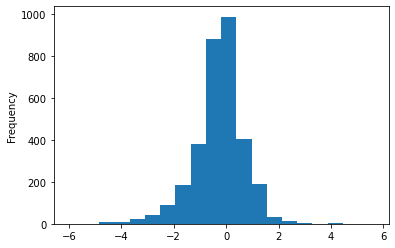

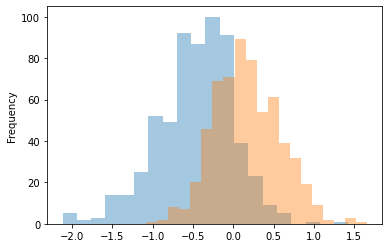

In [22]:
## your code here ...
fig, ax = plt.subplots()
data_monthly["anomaly"].plot.hist(bins=20, ax=ax)

fig, ax = plt.subplots()
data_monthly["anomaly"].loc["1850":"1900"].plot.hist(bins=20, alpha=0.4, ax=ax)
data_monthly["anomaly"].loc["1950":"2000"].plot.hist(bins=20, alpha=0.4, ax=ax)

In [23]:
# %load ../src/_solutions/time_series_analysis_060.py

***
## Objective 2 -  Construct an informative time series plot for the global temperature anomaly

The `pandas` library makes plotting very easy. Calling the `plot()` method on a `pd.Series` or `pd.DataFrame` object will create a plot. Note that `pandas` relies on the extremely powerful `matplotlib` library. Refer to the `matplotlib` [gallery](https://matplotlib.org/gallery/index.html) of the [online documentation](https://matplotlib.org/) to get an idea what `matplotlib` can do for you.



***
### Objective 2.1 -  Construct a simple time series plot of the global temperature anomaly

#### **Challenge 7: Plot a time series plot of the `anomaly` column. (Time: 3 Minutes)**

_Hint: Use the `plot()` method_

<AxesSubplot:>

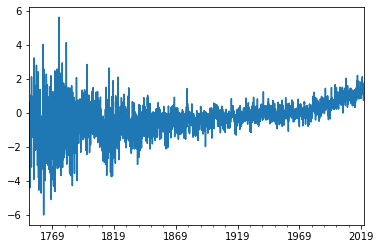

In [24]:
## your code here ... 
fig, ax = plt.subplots()
data_monthly["anomaly"].plot(ax=ax)

In [25]:
# %load ../src/_solutions/time_series_analysis_070.py

***
### Objective 2.2 -  Improve the simple time series plot by computing a 10-year running mean for the `anomaly` and the `uncertainty` columns.

#### **Challenge 8: Compute a 10-year running mean for the `anomaly` and the `uncertainty` columns and plot them.**
We compute a running mean by combining the `rolling()`  and the `mean()` method.   (Time: 10 minutes)
* The `rolling()` method takes several arguments. We need to find an appropriate value for the `window` argument. Further we set `center=True`. 
* Once we have called the `rolling()` method we chain it with the `mean()` method to compute the 10-year running mean. _Hint: Use the `plot()` method to verify the computation._
* Repeat the procedure for the `anomaly` and the `uncertainty` columns and add the two columns to the dataframe, denoted as `10-year-anomaly` and `10-year-uncertainty`. 
* Plot the `anomaly`, the `10-year-anomaly` as well as the `"10-year-uncertainty"` within one single plot. _Hint: Note that the `uncertainty` corresponds to the absolute value of deviation. Compute `10-year-anomaly` $+$ `10-year-uncertainty` and `10-year-anomaly` $-$ `10-year-uncertainty` to get the upper and lower bounds of uncertainty._ 

Rolling mean demo

In [26]:
## compute window length 10 years --> 10 * 12 months
w = 12*10

## compute 10-year-running mean for anomaly and plot the result
rolling_mean_anomaly = data_monthly["anomaly"].rolling(window=w, center=True).mean()

display(rolling_mean_anomaly.head(5))

display(rolling_mean_anomaly.sample(5))

1750-01   NaN
1750-02   NaN
1750-03   NaN
1750-04   NaN
1750-05   NaN
Freq: M, Name: anomaly, dtype: float64

1989-03    0.347717
1995-08    0.560625
2017-05         NaN
1978-01    0.142267
1848-02   -0.650700
Freq: M, Name: anomaly, dtype: float64

**Note that for the first years we can't calculate a 10 year mean.**

<AxesSubplot:>

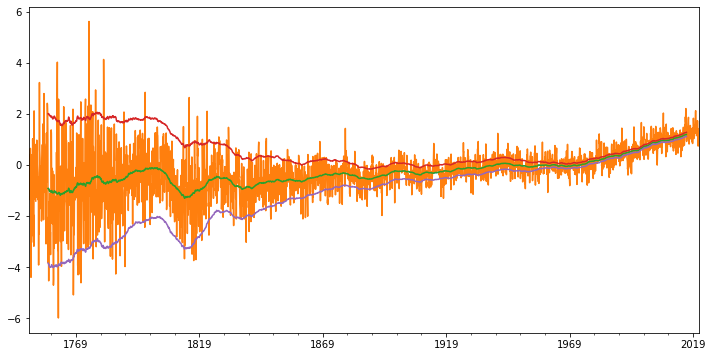

In [27]:
# create Figure and Axes objetcs
fig, ax = plt.subplots(figsize=(12,6))

## compute window length 10 years --> 12 * 10 months
w = 12*10

## compute 10-year-running mean for anomaly and plot the result
data_monthly["anomaly"].rolling(window=w, center=True).mean().plot(ax=ax)

## compute 10-year-running mean for anomaly and add the result to the data frame
data_monthly["10-year-anomaly"] = data_monthly["anomaly"].rolling(window=w, center=True).mean()

## compute 10-year-running mean for uncertainty and add the result to the data frame
data_monthly["10-year-uncertainty"] = data_monthly["uncertainty"].rolling(window=w, center=True).mean()

## check data set
data_monthly.sample(10)

## plot anomaly
data_monthly["anomaly"].plot(ax=ax)

## plot 10-year running mean
data_monthly["10-year-anomaly"].plot(ax=ax)

## compute upper and lower bound of temperature anomaly
upper_bound = data_monthly["10-year-anomaly"] + data_monthly["10-year-uncertainty"]
lower_bound = data_monthly["10-year-anomaly"] - data_monthly["10-year-uncertainty"]

## plot upper and lower bound of temperature anomaly
upper_bound.plot(ax=ax)
lower_bound.plot(ax=ax)

In [28]:
# %load ../src/_solutions/time_series_analysis_080.py

* For the sake of reproducibility we refactor our code and write a function called `plot_anomalies`, with two input argument, a `DataFrame` object and a `string`, corresponding to the title of the plot.

Note that we have already written the function for you. Moreover, we added some boilerplate code the control the figure aesthetics such as `color`, `linewidth`, `linestyle`, fillings (`fill_between`) and opacity (`alpha`); further we added a `title` and axis labels. 

#### **Challenge 9: Read the code line for line and try to figure out what each line of code is doing. (Time: 5 minutes)**
*The code is stored in the folder `../src/_solutions/` with the filename `time_series_analysis_f03.py`. We use the magic function `%load` to import the Python file.

    %load ../src/_solutions/time_series_analysis_f03.py

*Uncomment the code cell below.*

In [29]:
# %load ../src/_solutions/time_series_analysis_f03.py
def plot_anomalies(df, title):
    '''
    Function to create a time series plot
    '''
    
    ## compute window length 10 years --> 12 * 10 months
    w = 12*10
    
    ## compute 10-year-running mean for anomaly and add the result to the data frame
    df["10-year-anomaly"] = df["anomaly"].rolling(window=w, center=True).mean()
    ## compute 10-year-running mean for uncertainty and add the result to the data frame
    df["10-year-uncertainty"] = df["uncertainty"].rolling(window=w, center=True).mean()

    ## compute upper and lower bound of temperature anomaly
    upper_bound = df["10-year-anomaly"] + df["10-year-uncertainty"]
    lower_bound = df["10-year-anomaly"] - df["10-year-uncertainty"]
    
    ## Plotting ##
    ## Note that we make use to the matplotlib library as we have 
    ## even more controll over the aesthetics of the figure
    import matplotlib.pyplot as plt
    
    ## create figure and axis objects
    fig, ax = plt.subplots(figsize=(12,6))
    ## plot monthly anomaly
    df["anomaly"].plot(ax=ax, alpha=0.3, linewidth=0.5, color="blue")
    ## plot 10-year-anomaly
    df["10-year-anomaly"].plot(ax=ax, linewidth=2, color="red")
    ## fill area between upper and lower uncertainty bound
    ax.fill_between(df.index, lower_bound, upper_bound,color="gray", alpha=0.8)
    
    ## add line at y=0
    ax.axhline(y=0, linewidth=0.85, linestyle="--", color="black")

    ## set figure title
    ax.set_title(title, size=18)
    ## set label for y axis
    ax.set_ylabel("$^\circ$C")
    
    ## add legend
    plt.legend()
    
    return(fig, ax)

* Apply the `plot_anomalies()` function to create a figure.

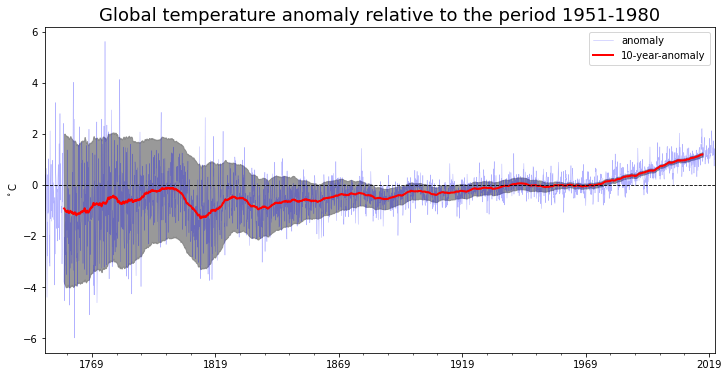

In [30]:
plot_anomalies(data_monthly, 
               title="Global temperature anomaly relative to the period 1951-1980");

***
## Objective 3 - Write a function to plot temperature anomalies for any given country/region of the database

In the previous sections we sequentially built up code segments that finally produce an informative time series plot. In this section we refactor our code to become even more generic. We write a function that produces such a time series plot for any given region or country name.

Again we build up our code base sequentially; however this time, we make use of the functions `read_temp_data()`, `monthly_index()` and `plot_anomalies()`. Hence, reducing the lines of code to write and in addition, our code becomes more readable.

We follow the procedure outlined below
1. Locate the data files (find the correct url) of interest in the open database of [Earth Berkeley](http://berkeleyearth.org/).
* Load temperature data from the internet and preprocess it using our `read_temp_data()` function.
* Assign a time based index to the data set using our `monthly_index()` function.
* Plot the data of interest using our `plot_anomalies()` function.

***
### Objective 3.1 - Locate the data files (find the correct url) of interest in the open database of [Earth Berkeley](http://berkeleyearth.org/)

Follow the link below and you see that the temperature data set for each particular country/region can be accessed via an unique url:

http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/

Note that Jupyter notebooks allow us to embed an `IFrame` into a notebook cell (see below)


In [31]:
from IPython.display import IFrame
IFrame("http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/", width="100%", height=400)

By investigating the structure of the database we realize that each particular data set can be assessed via an unique url, which may be decomposed into three parts:

Part 1 - the base url: `http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/...`   
Part 2 -  the country/region name: `...afghanistan...`, `...africa...` or `...angola...`, among others.   
Part 3 -  the url suffix: `...-TAVG-Trend.txt`   

For example, the url for the temperature data set of Germany is 

`BASE_URL` + `COUNTRY` + `SUFFIX` = http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/germany-TAVG-Trend.txt

#### **Challenge 10: Wrap this idea into a python function called `data_url()`, which takes one input argument, the name of the country/region. (Time: 5 minutes)**
_Hint: Concatenate `string` objects using the `+` sign_

In [32]:
## your code here ...
def data_url(country):
    '''
    Function to build url for data retrieval
    '''
    BASE_URL = "http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/"
    SUFFIX_URL = "-TAVG-Trend.txt"
    return(BASE_URL + country + SUFFIX_URL)

In [33]:
# %load ../src/_solutions/time_series_analysis_100.py

* What is the url for the temperature data set for Germany?    
Use the function `data_url()` to build the url for accessing temperature data for Germany. 

In [34]:
data_url("germany")

'http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/germany-TAVG-Trend.txt'

***
### Objective 3.1, 3.2 and 3.3 - Load temperature data, assign a time based index and plot the data of interest

Owing to the fact that we consequently refactored our code into python functions, these tasks become fairly easy. We just have to call one function after the other.    

#### **Challenge 11: Apply `data_url()`, followed by `read_temp_data()`, `monthly_index()` and `plot_anomalies()` to plot the temperature anomaly for Germany from 1750 to present. (Time: 4 minutes)**

*Note that the `pd.read_csv()` function, built into our `read_temp_data()` function, also accepts an url as input argument and that the  `plot_anomalies()` function awaits two arguments, a `DataFrame` object and a `string` object as `title`.*

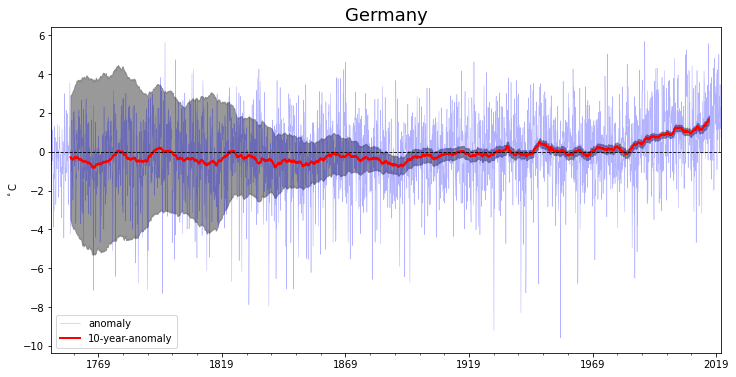

In [35]:
## your code here ...
URL = data_url("germany")
df = read_temp_data(URL)
df = monthly_index(df)
plot_anomalies(df, title="Germany");

In [36]:
# %load ../src/_solutions/time_series_analysis_110.py

* Once again, for the sake of reproducibility we refactor our code and write a function called `plot_country_anomalies`, with one input argument, a `string` object referring to a particular country/region of interest. Note that we have already written the function for you (`time_series_analysis_f04.py`). 

      %load ../src/_solutions/time_series_analysis_f04.py
    
_Uncomment the code cell below._

In [37]:
# %load ../src/_solutions/time_series_analysis_f04.py
def plot_country_anomalies(AOI):
    '''
    Function to plot temperature anomaly data for any given country/region 
    of the open database of Earth Berkeley
    '''
    URL = data_url(AOI)
    df = read_temp_data(URL)
    df = monthly_index(df)
    plot_title = "Temperature anomaly relative to the period 1951-1980 for " + AOI.capitalize()
    return(plot_anomalies(df, title=plot_title))

#### **Challenge 12: Use the function `plot_country_anomalies()` to plot the temperature anomalies for**
* `germany`
* `australia` and
* `china`   
(Time: 6 Minutes)


In [38]:
## your code here ...

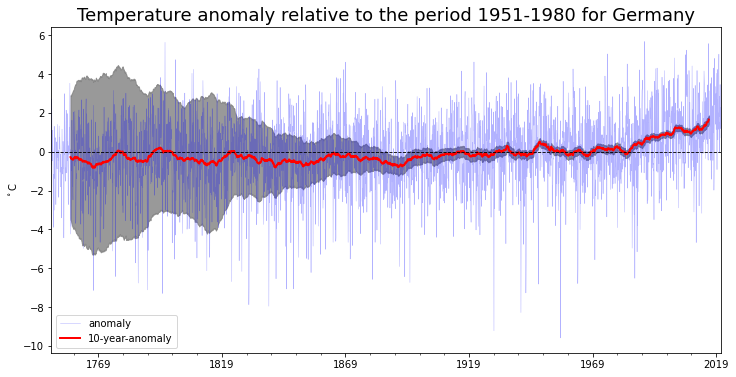

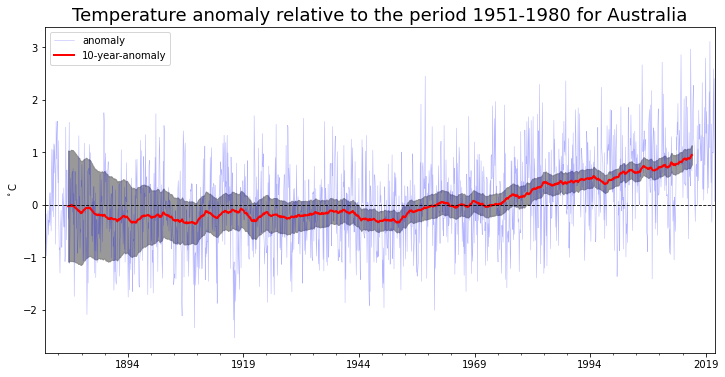

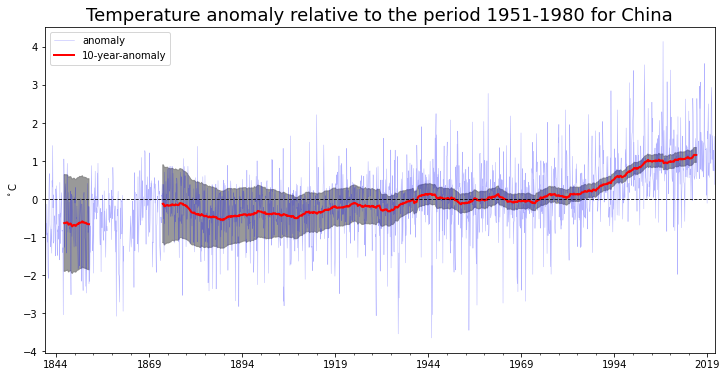

In [39]:
# %load ../src/_solutions/time_series_analysis_120.py
## Solution Challenge 12
plot_country_anomalies("germany")
plot_country_anomalies("australia")
plot_country_anomalies("china");

***

## Objective 4 - Save a time series plot to disk

Finally, we are done and want to save one of our plots to disk. Therefore we call the `plt.savefig()` function.

#### **Challenge 13: Create a plot of a country of your choice. Use the function `plt.savefig()` to save the plot to disk. Save the plot as a `.png` file with a resolution of 300 dpi in the folder `../figures/`. (Time: 3 Minutes)**



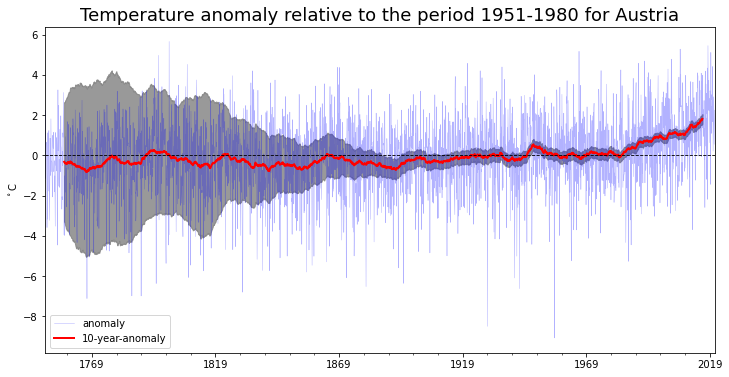

In [40]:
# your code here ...
plot_country_anomalies("austria");
plt.savefig("../figures/ts_plot_austria.png", dpi=300) 

In [41]:
# %load ../src/_solutions/time_series_analysis_130.py

***